# Piece

When we put a small piece of a page in the pipeline we get problems.

In [1]:
%load_ext autoreload
%autoreload 2

Import the `fusus` package.
If you do not have it yet, see
[get `fusus`](https://among.github.io/fusus/fusus/about/install.html#get-the-software).

In [2]:
from fusus.book import Book

Initialize the processing line.

In [3]:
B = Book(cd="~/github/among/fusus/pathological")

  0.00s Batch of 1 pages: 999
  0.00s Start batch processing images
   |     0.25s     1 999.jpg                                 
  0.25s all done


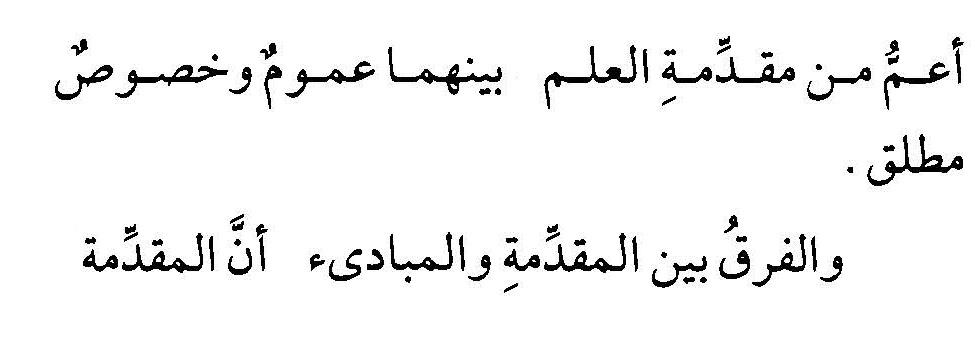

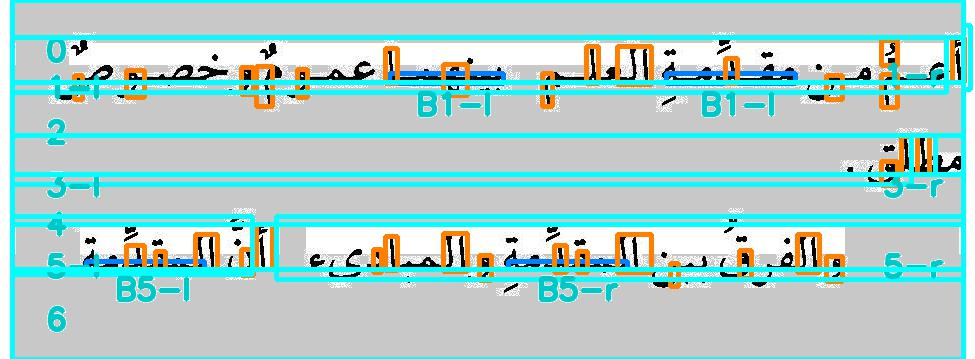

In [4]:
lastPage = B.process(pages=999, doOcr=False, batch=False)
lastPage.show(stage="orig,layout")

Layout detection has failed spectacularly, and the main reason is that too many
horizontal and vertical strokes have been detected.

If we try the complete pipeline, including OCR, we get an error,
even before the actual OCR process.
Something in preparing the images is going out of bounds:

In [5]:
try:
    lastPage = B.process(pages=999, batch=False)
except Exception as e:
    B.error(f"ERROR: {e}\n")

  0.00s Batch of 1 pages: 999
  0.00s Start batch processing images
   |     0.18s Loading for Kraken: ~/github/among/fusus/model/arabic_generalized.mlmodel
   |     7.82s model loaded


   |     8.09s ERROR: tile cannot extend outside image
   |   


We can make this work, by telling the pipeline what fraction of the page this is.
Note that the OCR delivers results.

  0.00s Batch of 1 pages: 999
  0.00s Start batch processing images
   |     0.53s     1 999.jpg                                 
  0.53s all done


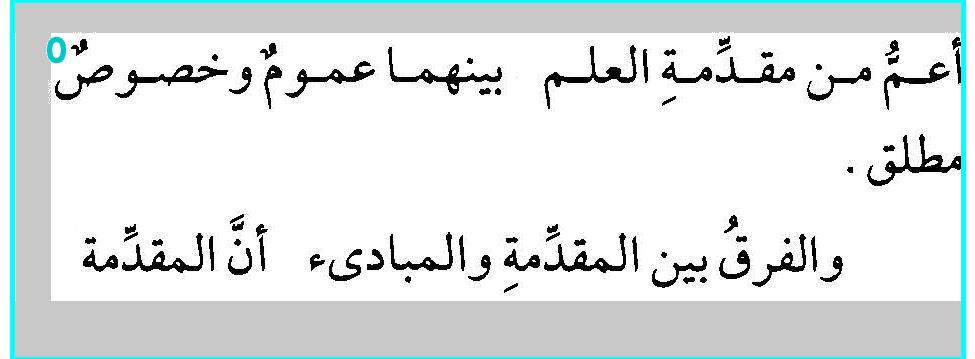

page	stripe	column	line	left	top	right	bottom	confidence	letters	punc
0		1	870	33	957	114	99	أعـم	 
0		1	792	33	870	114	99	من	 
0		1	651	33	792	114	98	مقدمة	 
0		1	500	33	651	114	99	العلم	 
0		1	368	33	500	114	99	بينهما	 
0		1	251	33	368	114	100	عموم	 
0		1	53	33	251	114	91	وخصوص	
0		2	831	127	957	196	92	مطلق	.
0		3	711	207	848	302	93	والفرق	 
0		3	640	207	711	302	99	بين	 
0		3	492	207	641	302	95	المقدمة	 
0		3	270	207	493	302	93	والمبادىء	 
0		3	218	207	271	302	90	أن	 
0		3	67	207	219	302	93	المقدمة	


In [6]:
lastPage = B.process(pages=999, sizeW=0.5, sizeH=0.1, batch=False)
lastPage.show(stage="layout,word")